In [1]:
import anndata as ad
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sc.settings.set_figure_params(figsize=(5,5))
sns.set(font_scale=2)

In [8]:
from nxfvars import nxfvars
input_adata = nxfvars.get('input_adata', '../results/scrnaseq/data/adata.h5ad')

In [2]:
# When using papermil need to add cell tags: parameters to this cell for it to work!!
input_adata = '../results/scrnaseq/data/adata.h5ad'
artifact_dir = ""

In [3]:
adata = ad.read_h5ad(input_adata)

In [4]:
# annotate the group of mitochondrial genes as 'mito'
adata.var['mito'] = adata.var_names.str.startswith('mt-')
# ribosomal genes as ribo
adata.var['ribo'] = adata.var_names.str.startswith(('Rps', 'Rpl'))

sc.pp.calculate_qc_metrics(adata, qc_vars=['mito', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [5]:
adata.obs["sample"] = pd.Categorical(adata.obs["sample"])

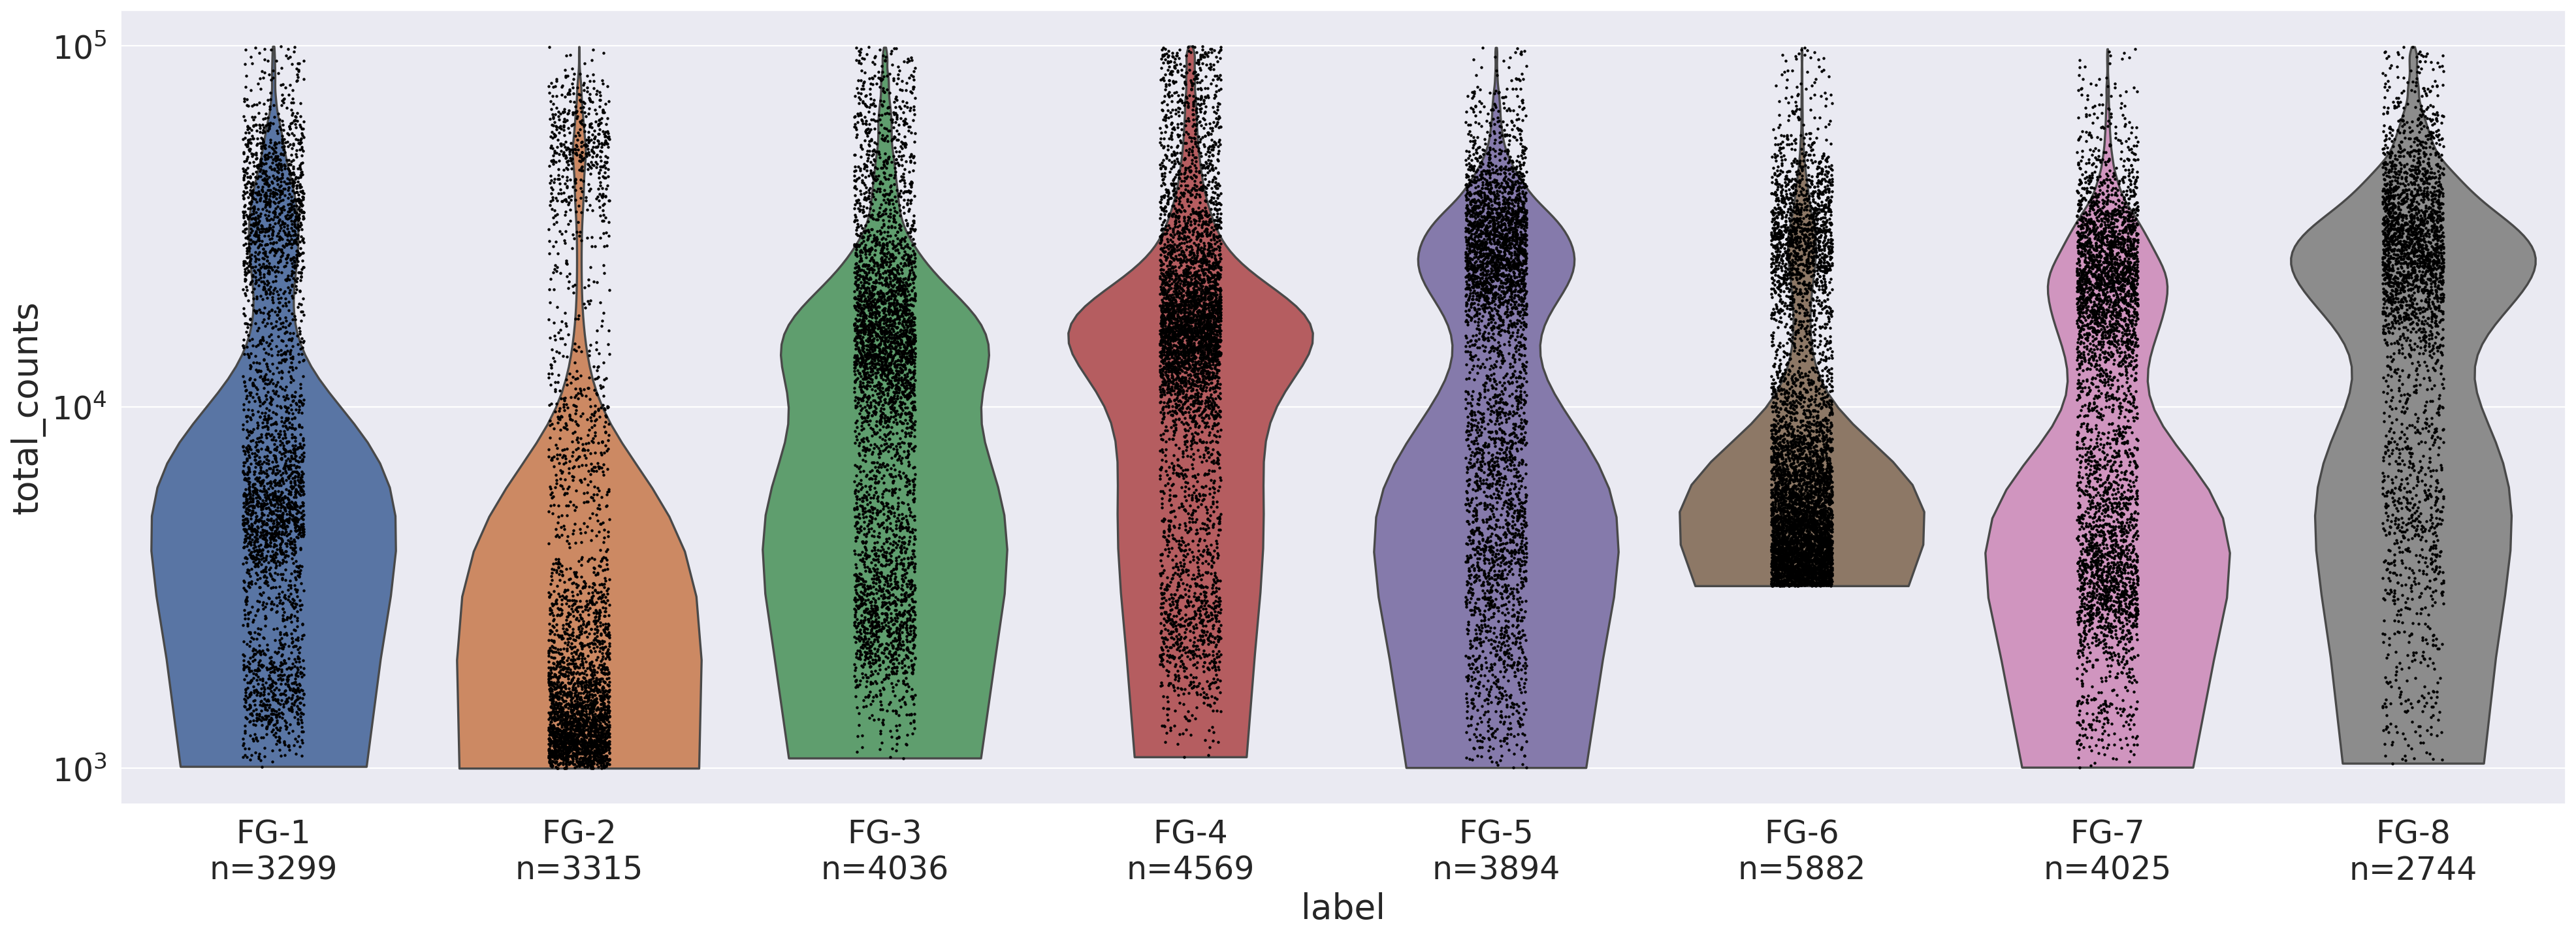

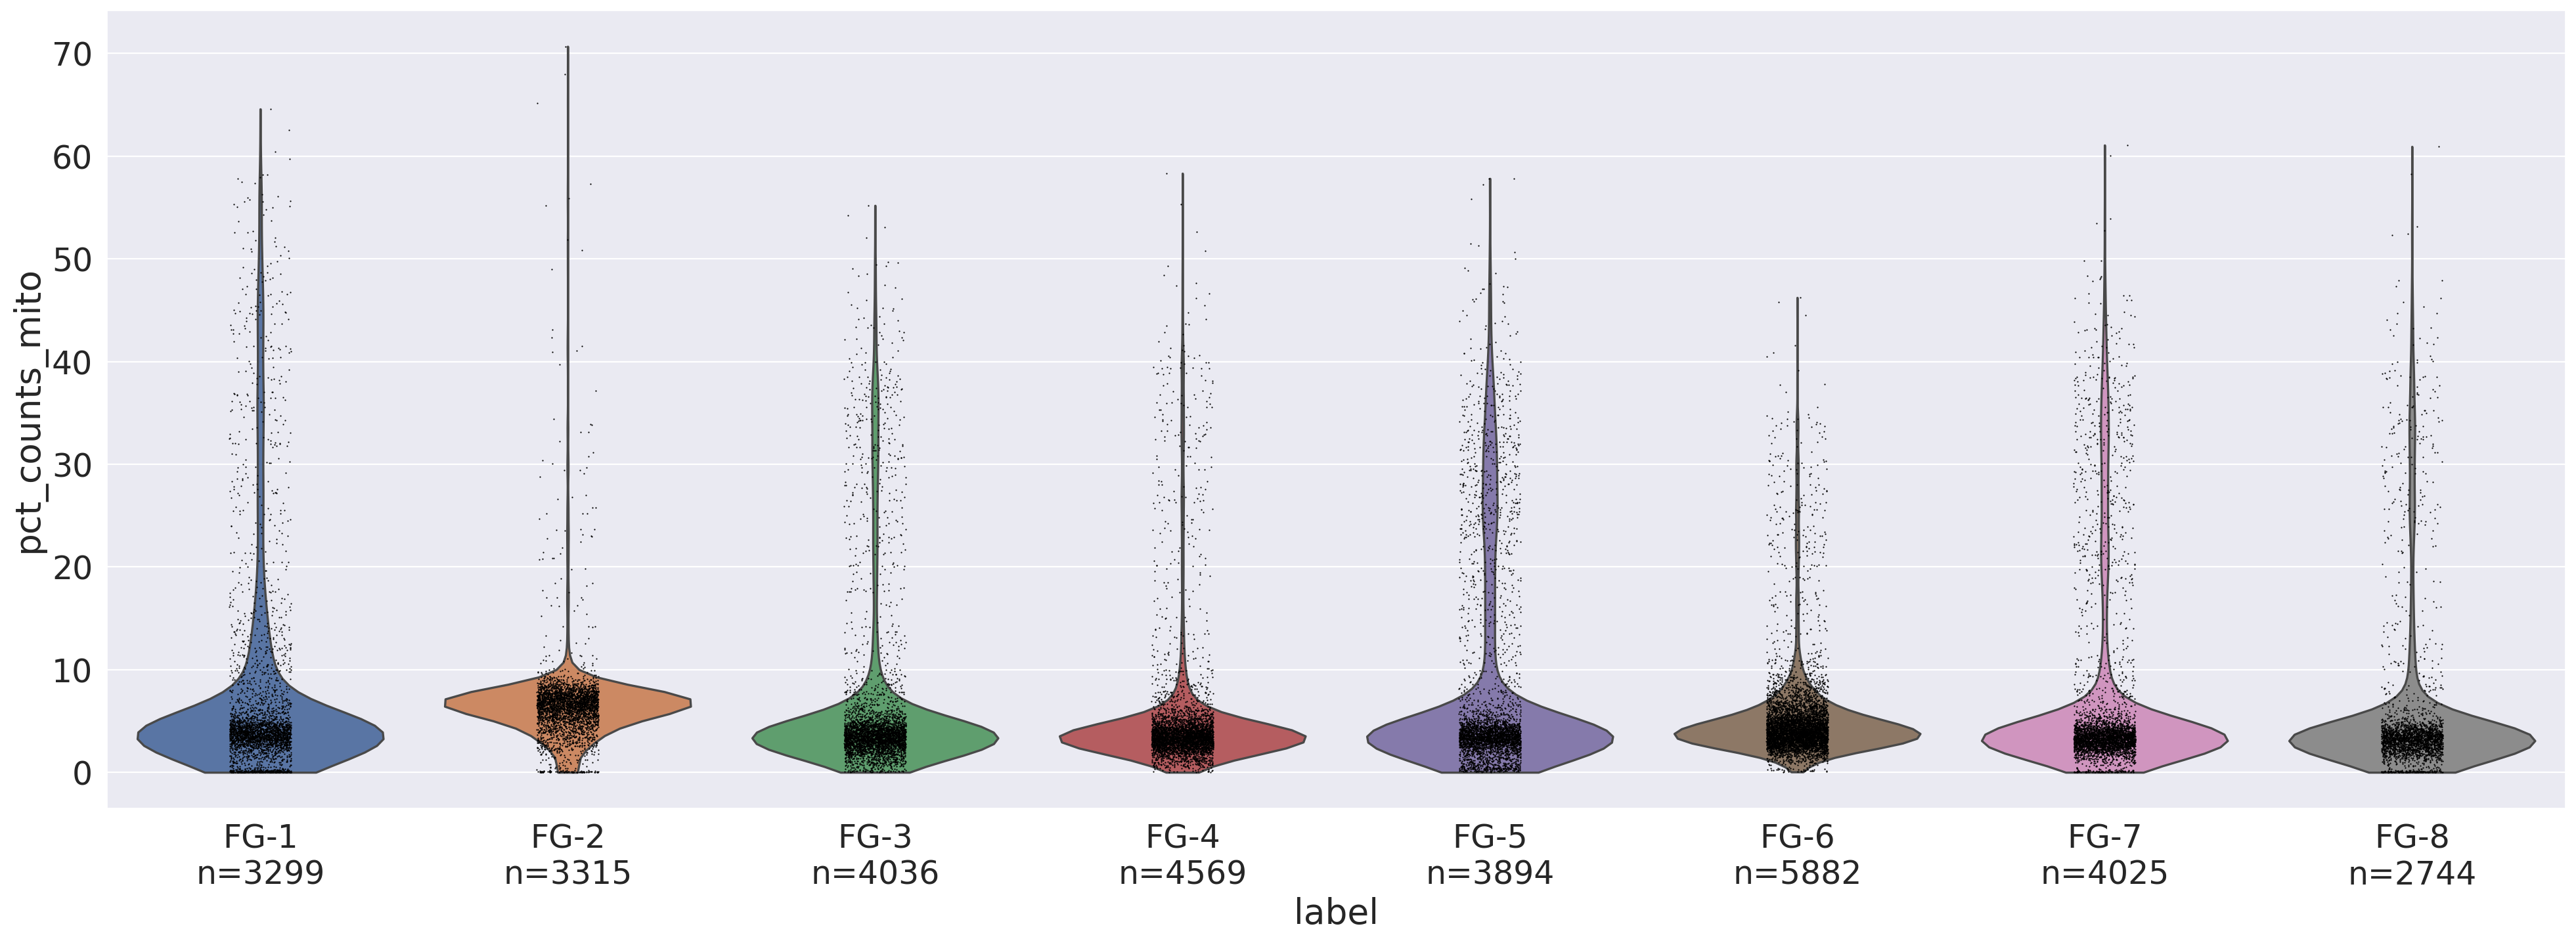

In [6]:
adata_p = adata.copy()
adata_p.obs["sample"] = pd.Categorical(adata_p.obs["sample"])

adata_p.obs['sample_counts'] = np.NaN
for s in adata_p.obs["sample"].cat.categories:
    index_w_sel_sample = adata_p.obs.where(adata_p.obs['sample']==s).dropna(how='all').index
    adata_p.obs.loc[index_w_sel_sample,"sample_counts"] = adata_p.obs['sample'].value_counts().loc[s]
    
adata_p.obs['sample_counts'] = adata_p.obs['sample_counts'].astype(int)

# Create new label column for plots: sample + sample_counts
adata_p.obs['label'] = adata_p.obs['sample'].astype(str) + '\nn=' + adata_p.obs['sample_counts'].astype(str)
adata_p.obs["label"] = pd.Categorical(adata_p.obs["label"])

fig, ax = plt.subplots(1,1,figsize=(30,10))
sc.pl.violin(adata_p, 'total_counts', groupby='label', size=2, log=True, cut=0, ax=ax)

fig, ax = plt.subplots(1,1,figsize=(30,10))
sc.pl.violin(adata_p, 'pct_counts_mito', groupby='label', ax=ax)

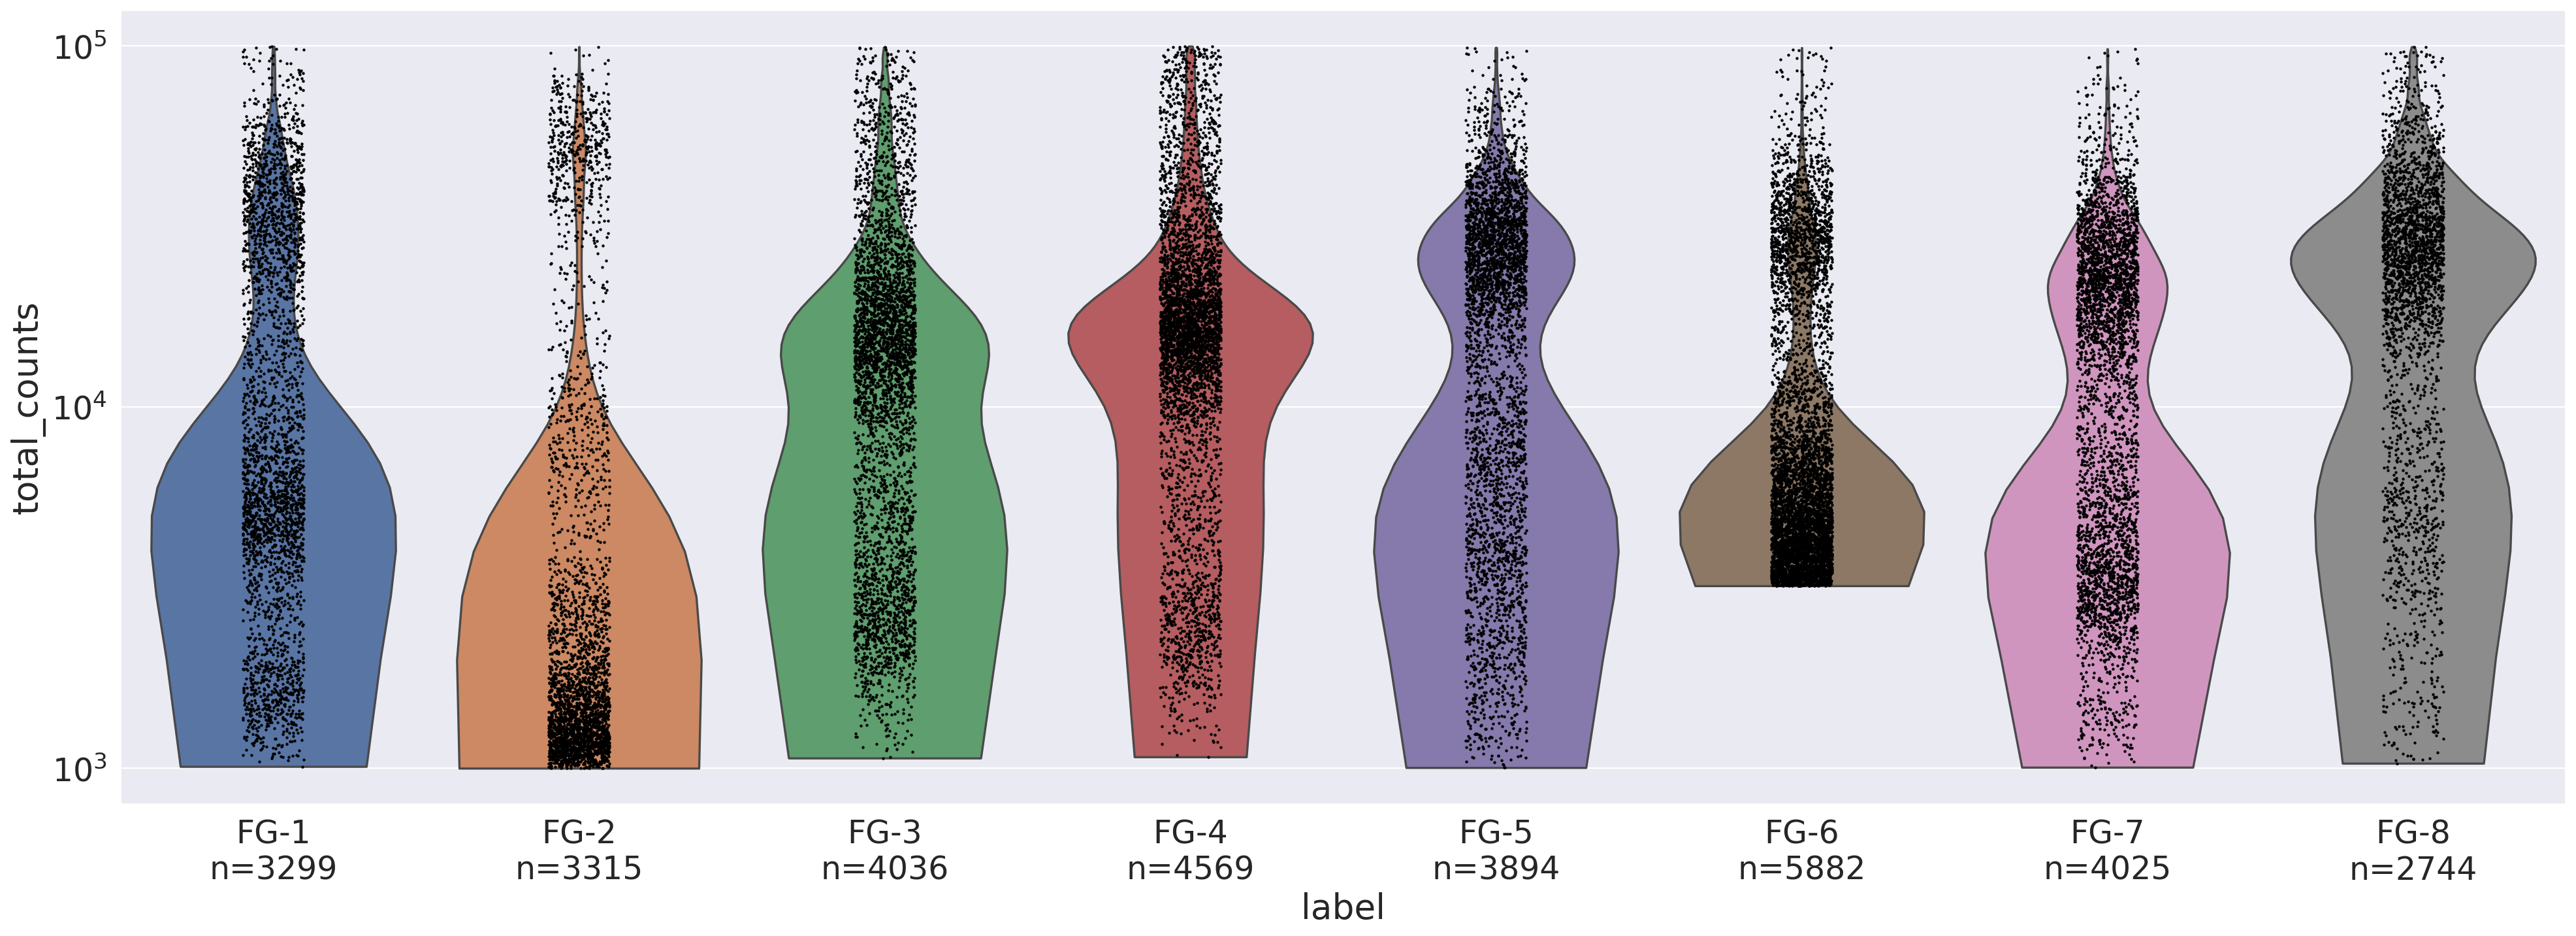

PermissionError: [Errno 13] Permission denied: '/01-Violin_total_counts_raw_sub.pdf'

In [7]:
# Sample quality plots
fig, ax = plt.subplots(1,1,figsize=(30,10))
sc.pl.violin(adata_p, 'total_counts', groupby='label', size=2, log=True, cut=0, ax=ax)
fig.savefig(f"{artifact_dir}/01-Violin_total_counts_raw_sub.pdf", bbox_inches="tight")